# Stock Market Data Analysis Project

## Overview
This notebook analyzes historical stock price data to evaluate performance, risk, and relationships between different stocks. The analysis includes:

- Loading and preprocessing stock data
- Calculating and visualizing returns
- Performing statistical analysis (standard deviation, variance, mean returns)
- Computing the Sharpe ratio to measure risk-adjusted performance
- Analyzing correlations between different stocks

## Purpose
The goal is to provide insights into stock performance and risk metrics that can help with investment decision-making. By examining historical price movements, return distributions, and correlations, we can better understand the risk/reward characteristics of these stocks.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data_file = './data/stock_data.csv'

data = pd.read_csv(data_file, index_col='Date', parse_dates=True)
print(data.head())

                  AAPL         JPM         SPY        TSLA        XOM
Date                                                                 
2021-01-04  126.405212  112.308479  348.299438  243.256668  34.851486
2021-01-05  127.968048  112.919601  350.698273  245.036667  36.531075
2021-01-06  123.660477  118.221802  352.794891  251.993332  37.463238
2021-01-07  127.880157  122.104164  358.036530  272.013336  37.757172
2021-01-08  128.983917  122.238983  360.076569  293.339996  38.177071


In [7]:
na_rows = data.isna().sum()
print(na_rows)

AAPL    0
JPM     0
SPY     0
TSLA    0
XOM     0
dtype: int64


In [5]:
returns = data.pct_change().dropna()
print(returns.head())

                AAPL       JPM       SPY      TSLA       XOM
Date                                                        
2021-01-05  0.012364  0.005441  0.006887  0.007317  0.048193
2021-01-06 -0.033661  0.046956  0.005978  0.028390  0.025517
2021-01-07  0.034123  0.032840  0.014857  0.079447  0.007846
2021-01-08  0.008631  0.001104  0.005698  0.078403  0.011121
2021-01-11 -0.023249  0.014924 -0.006741 -0.078214  0.030356


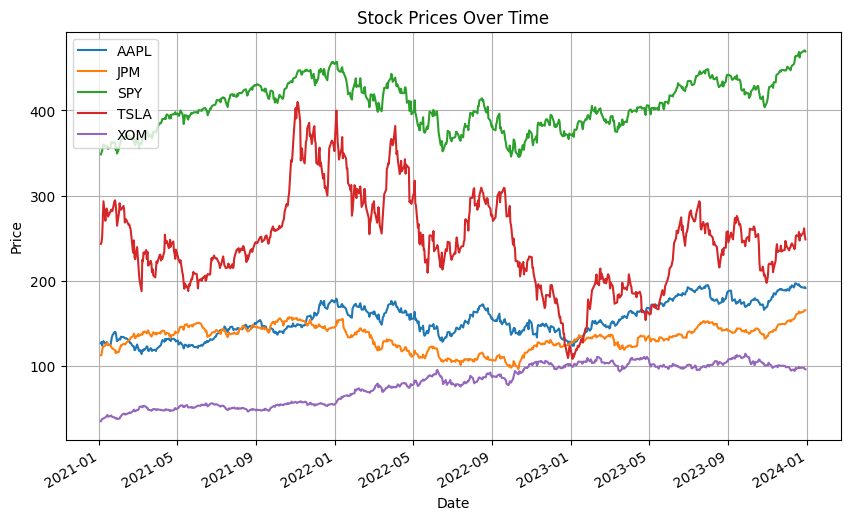

In [8]:
data.plot(figsize=(10, 6))
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid()


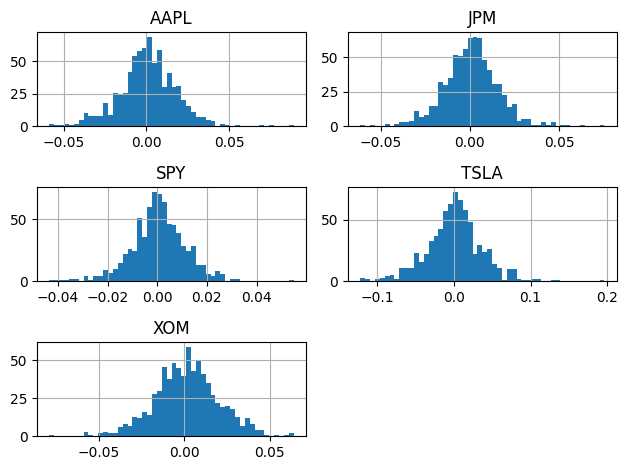

In [11]:
returns.hist(bins=50)
plt.title('Histogram of Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [15]:
std_dev = returns.std()
print(f'Standard Deviation of Returns:\n{std_dev}\n')

var = returns.var()
print(f'Variance of Returns:\n{var}\n')

mean_returns = returns.mean()
print(f'Mean Returns:\n{mean_returns}\n')

Standard Deviation of Returns:
AAPL    0.017511
JPM     0.015343
SPY     0.011085
TSLA    0.037099
XOM     0.019024
dtype: float64

Variance of Returns:
AAPL    0.000307
JPM     0.000235
SPY     0.000123
TSLA    0.001376
XOM     0.000362
dtype: float64

Mean Returns:
AAPL    0.000705
JPM     0.000631
SPY     0.000458
TSLA    0.000715
XOM     0.001527
dtype: float64



In [16]:
sharpe_ratio = mean_returns / std_dev
print(f'Sharpe Ratio:\n{sharpe_ratio}\n')

Sharpe Ratio:
AAPL    0.040240
JPM     0.041148
SPY     0.041315
TSLA    0.019271
XOM     0.080247
dtype: float64



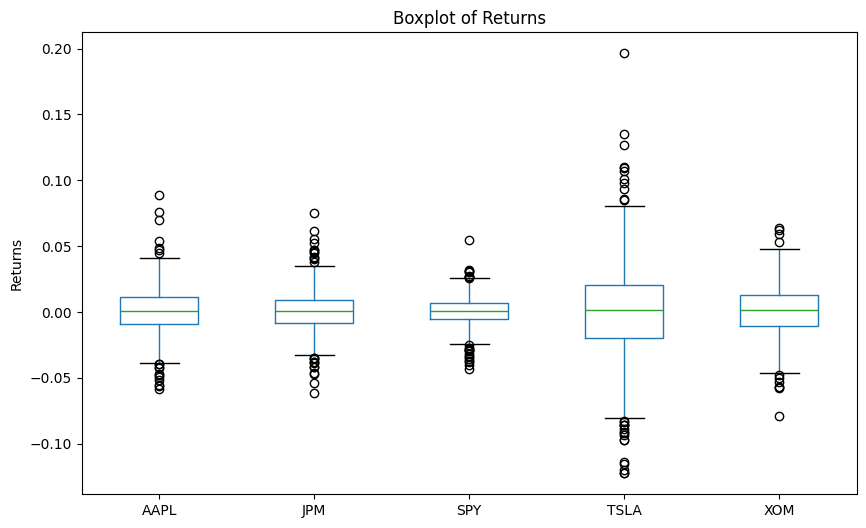

In [18]:
returns.boxplot(figsize=(10, 6))
plt.title('Boxplot of Returns')
plt.ylabel('Returns')
plt.grid()

Correlation Matrix:
          AAPL       JPM       SPY      TSLA       XOM
AAPL  1.000000  0.370687  0.805186  0.545297  0.175569
JPM   0.370687  1.000000  0.629850  0.270885  0.385658
SPY   0.805186  0.629850  1.000000  0.561970  0.356925
TSLA  0.545297  0.270885  0.561970  1.000000  0.080799
XOM   0.175569  0.385658  0.356925  0.080799  1.000000



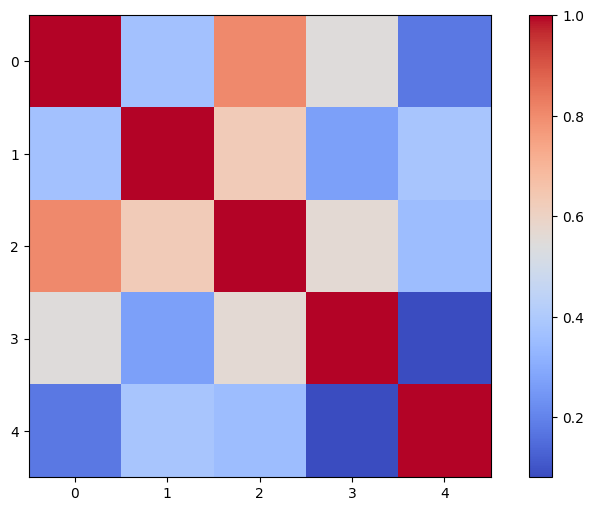

In [20]:
corr = returns.corr()
print(f'Correlation Matrix:\n{corr}\n')

plt.figure(figsize=(10, 6))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()